<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Assignment_K_Means_Clustering_Customer_EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
    ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  
3            1                  0                0               6952      0  
4           26               2077                4               6935      1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>


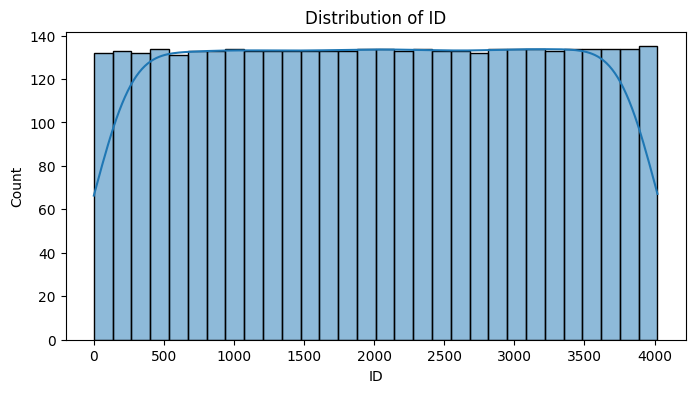

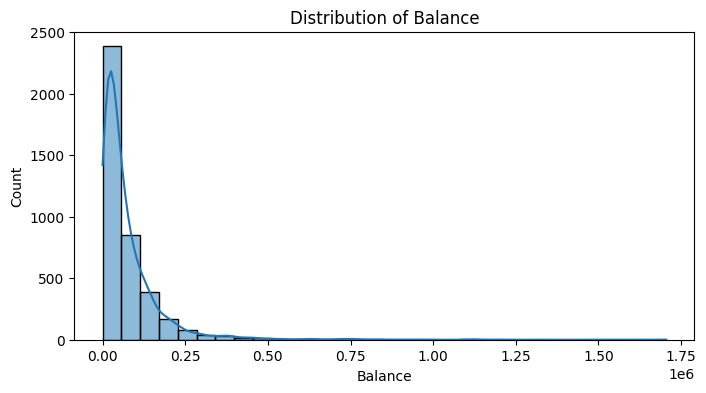

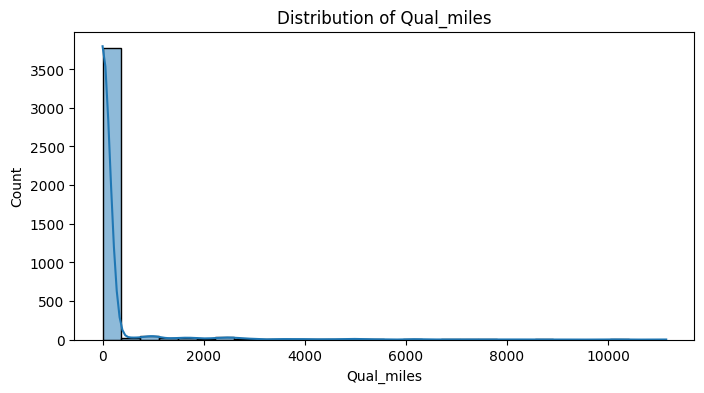

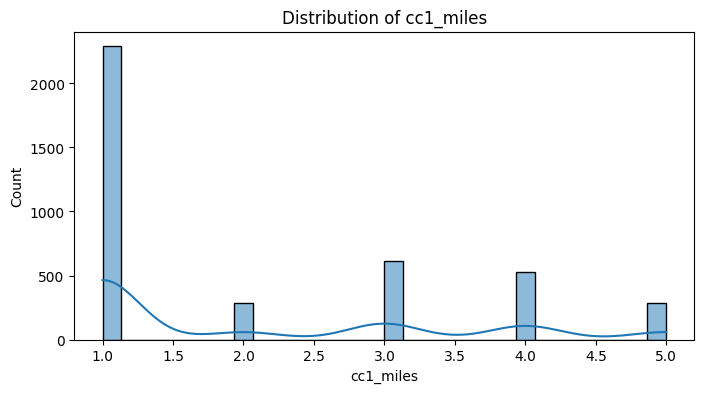

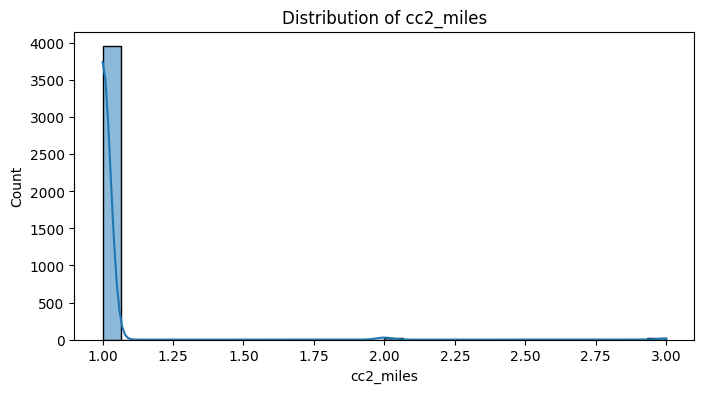

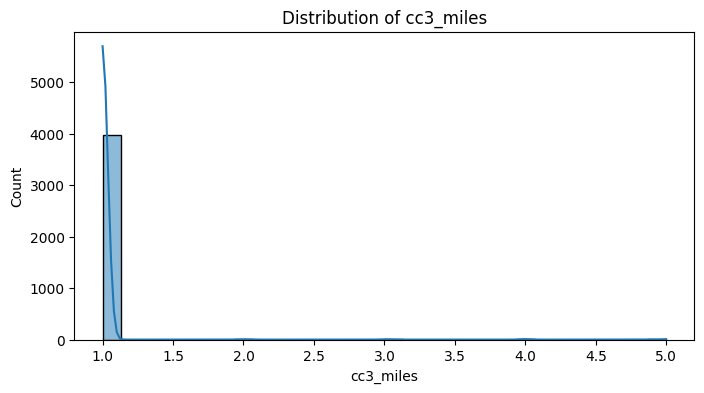

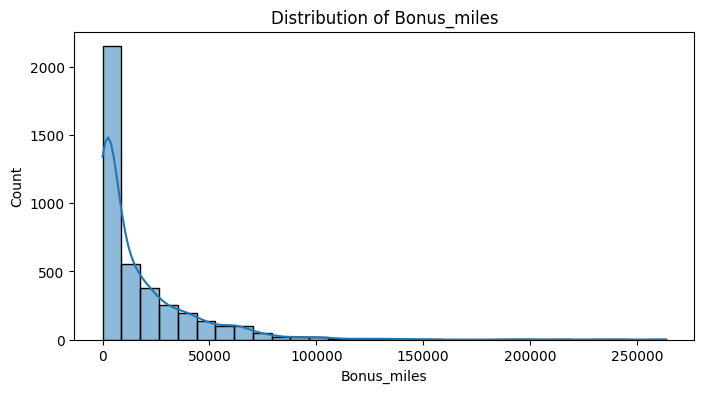

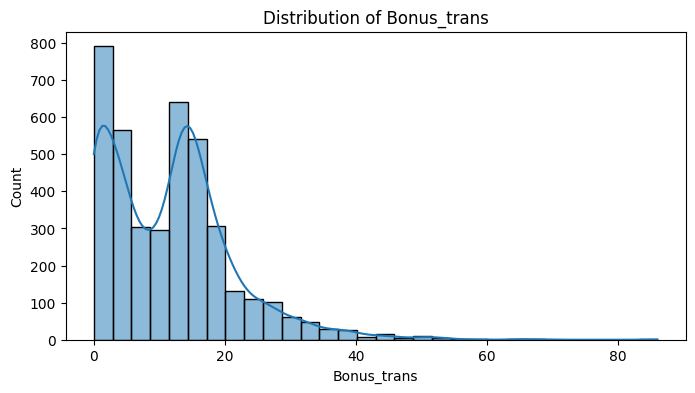

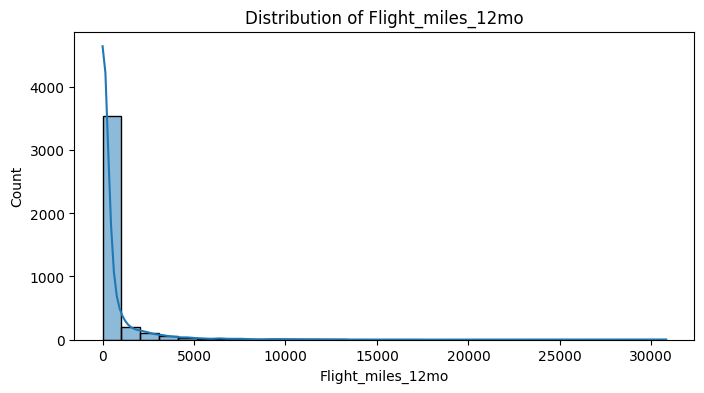

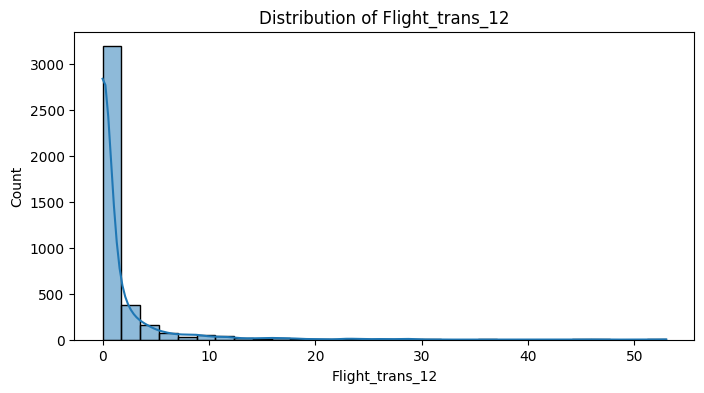

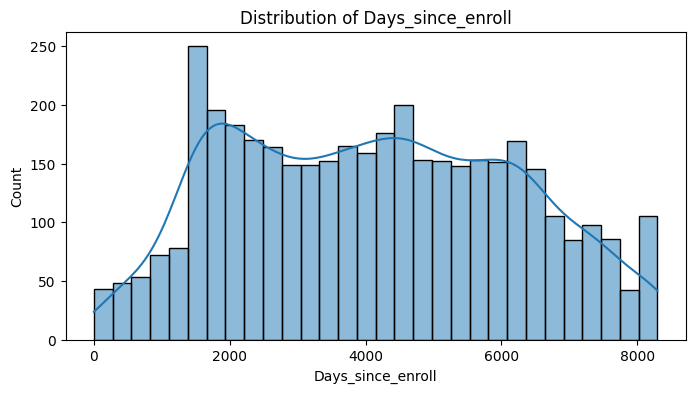

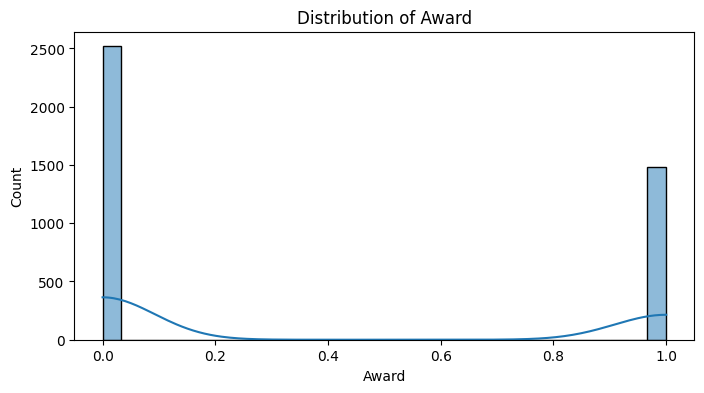

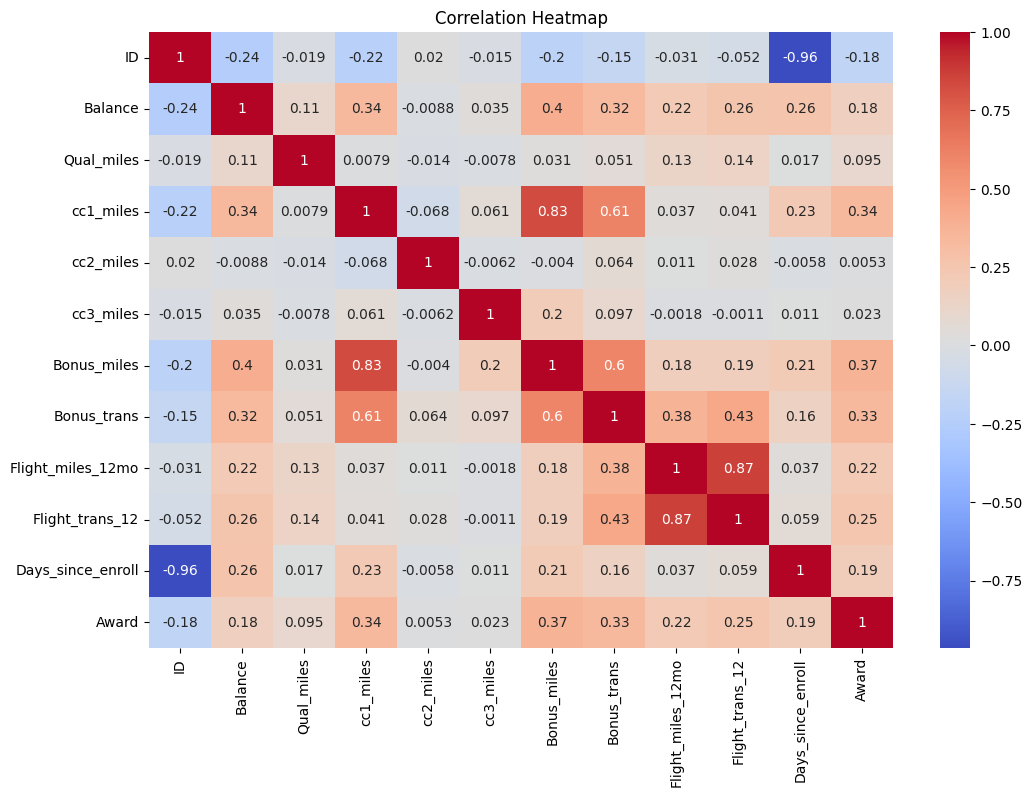

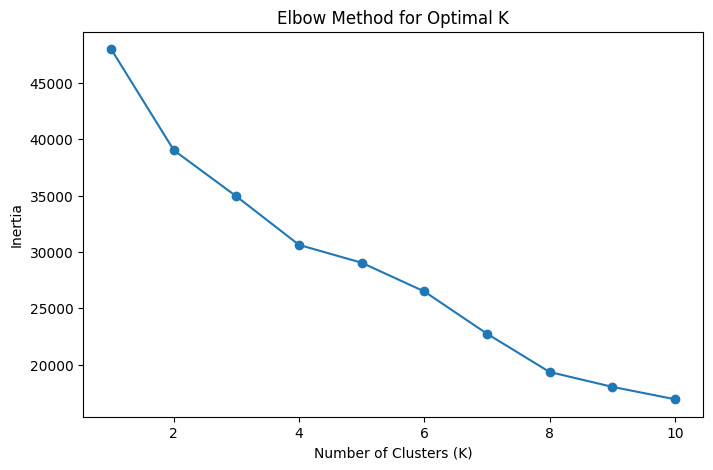

Silhouette Score for K=3: 0.20


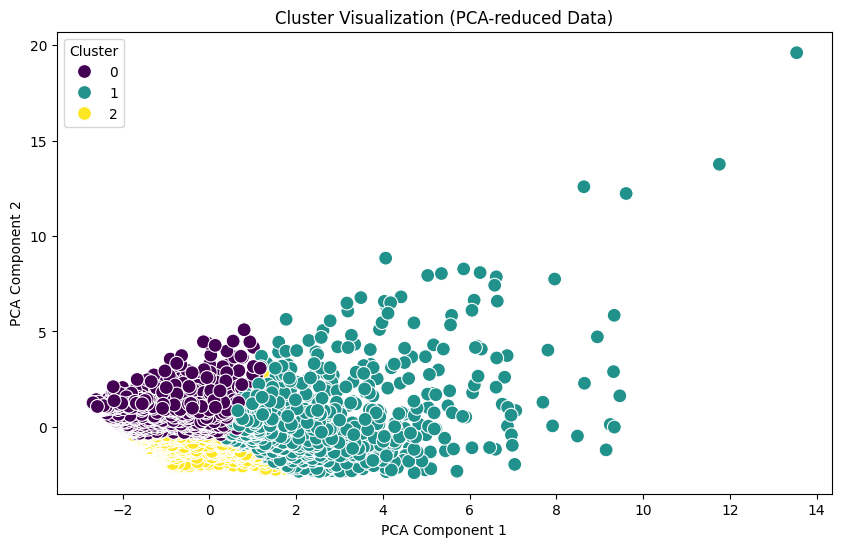


Cluster Summary:
                   ID        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        3111.388308   40980.913231  105.005538   1.444308   1.016615   
1        1533.872934  150218.949380  297.365702   3.833678   1.007231   
2        1078.568990   58553.187767   83.805121   1.549075   1.017070   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.001846   6917.616000     8.138462         237.179692   
1         1.046488  48249.512397    21.637397        1197.568182   
2         1.000711   7550.203414     8.695590         209.886202   

         Flight_trans_12  Days_since_enroll     Award  
Cluster                                                
0               0.691077        2196.562462  0.225231  
1               3.589876        4983.925620  0.750000  
2               0.636558        5744.142959  0.276

In [1]:
# Step 1: Setup and Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = "/content/EastWestAirlines.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Display dataset structure and info
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Handle missing values (if any)
print("\nMissing Values:\n", data.isnull().sum())
data = data.dropna()

# Step 2: Data Exploration
# Visualize distributions of numerical features
numeric_columns = data.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Preprocessing and Parameter Selection
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Step 4: K-Means Clustering
# Finding the optimal number of clusters (K) using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Step 5: Choose K based on the elbow point (e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Evaluate using silhouette score
sil_score = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.2f}")

# Step 6: Cluster Analysis
# Visualize clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette="viridis", s=100)
plt.title("Cluster Visualization (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:\n", cluster_summary)

# Save the results
data.to_csv("Clustered_EastWestAirlines.csv", index=False)
print("Clustered data saved as 'Clustered_EastWestAirlines.csv'.")
